In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook() # Visualise inside a notebook
from gensim import similarities
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore, LsiModel
from gensim.models import CoherenceModel

In [62]:
nlp = spacy.load('en_core_web_md')

In [63]:
df = pd.DataFrame({'filename':[], 'text':[]})
for i in range(1,101):
    f = open(f'resources/Text_Document_Classification/technologie/technologie_{str(i)}.txt', 'r')
    text = f.read()
    df.loc[len(df.index)] = {'filename': f'technologie_{str(i)}.txt', 'text': text}

In [64]:
df.head()

,filename,text
0,technologie_1.txt,The Arizona Attorney General (AG) Mark Brnovic...
1,technologie_2.txt,China net cafe culture crackdown\n\nChinese au...
2,technologie_3.txt,Microsoft seeking spyware trojan\n\nMicrosoft ...
3,technologie_4.txt,Digital guru floats sub-$100 PC\n\nNicholas Ne...
4,technologie_5.txt,Technology gets the creative bug\n\nThe hi-tec...


In [65]:
docs = list(nlp.pipe(df['text']))

In [66]:
docs[0]

The Arizona Attorney General (AG) Mark Brnovich has filed a consumer fraud lawsuit against Google, alleging that the company used “deceptive” practices to track the location of users even after they turned off location tracking.

Brnovich shared information about the lawsuit on his Twitter account. He accused Google of using “deceptive and unfair practices to obtain users’ location data”. This data is exploited for advertising, which accounts for more than 80 per cent of Google’s revenue.

Google collects detailed information about its users, including their physical locations, to target users for advertising. Often, this is done without the users’ consent or knowledge.

Brnovich wrote on Twitter: “Google collects detailed information about its users, including their physical locations, to target users for advertising. Often, this is done without the users’ consent or knowledge.”

He told the Washington Post that Google has been trying to find “misleading ways” to obtain information fr

### Preprocessing

#### Removing stopwords

In [67]:
to_remove = ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for doc in docs:
    proj_tok = [token.lemma_.lower() for token in doc if token.pos_ not in to_remove and not token.is_stop and token.is_alpha]
    tokens.append(proj_tok)

In [68]:
tokens

[['arizona',
  'attorney',
  'general',
  'ag',
  'mark',
  'brnovich',
  'file',
  'consumer',
  'fraud',
  'lawsuit',
  'google',
  'allege',
  'company',
  'deceptive',
  'practice',
  'track',
  'location',
  'user',
  'turn',
  'location',
  'tracking',
  'brnovich',
  'share',
  'information',
  'lawsuit',
  'twitter',
  'account',
  'accuse',
  'google',
  'deceptive',
  'unfair',
  'practice',
  'obtain',
  'user',
  'location',
  'datum',
  'data',
  'exploit',
  'advertising',
  'account',
  'cent',
  'google',
  'revenue',
  'google',
  'collect',
  'detailed',
  'information',
  'user',
  'include',
  'physical',
  'location',
  'target',
  'user',
  'advertising',
  'user',
  'consent',
  'knowledge',
  'brnovich',
  'write',
  'twitter',
  'google',
  'collect',
  'detailed',
  'information',
  'user',
  'include',
  'physical',
  'location',
  'target',
  'user',
  'advertising',
  'user',
  'consent',
  'knowledge',
  'tell',
  'washington',
  'post',
  'google',
  'try

In [69]:
df = pd.DataFrame({'tokens':tokens, 'doc': docs})
df

,tokens,doc
0,"[arizona, attorney, general, ag, mark, brnovic...","(The, Arizona, Attorney, General, (, AG, ), Ma..."
1,"[china, net, cafe, culture, crackdown, chinese...","(China, net, cafe, culture, crackdown, \n\n, C..."
2,"[microsoft, seek, spyware, trojan, microsoft, ...","(Microsoft, seeking, spyware, trojan, \n\n, Mi..."
3,"[digital, guru, float, pc, nicholas, negropont...","(Digital, guru, floats, sub-$100, PC, \n\n, Ni..."
4,"[technology, get, creative, bug, hi, tech, art...","(Technology, gets, the, creative, bug, \n\n, T..."
...,...,...
95,"[california, set, fine, spyware, maker, comput...","(California, sets, fines, for, spyware, \n\n, ..."
96,"[web, help, collect, aid, donation, web, help,...","(Web, helps, collect, aid, donations, \n\n, Th..."
97,"[mobile, rack, year, use, mobile, phone, uk, c...","(Mobiles, rack, up, 20, years, of, use, \n\n, ..."
98,"[blog, mainstream, web, log, blog, estimate, w...","(Blogs, take, on, the, mainstream, \n\n, Web, ..."


#### Creating a dictionary and corpus

In [70]:
dictionary = Dictionary(df['tokens'])
len(dictionary.token2id)

4073

Filter out low and high frequency words and limit the dictionary to 1000 words

In [71]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [72]:
len(dictionary.token2id)

731

In [73]:
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

In [74]:
corpus

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 2),
  (4, 3),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 3),
  (19, 1),
  (20, 3),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 3),
  (27, 9),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 2),
  (41, 2),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 22),
  (49, 5),
  (50, 4),
  (51, 1),
  (52, 2),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 3),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 3),
  (73, 1),
  (74, 1),
  (75, 5),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1

### Building the LDA model

#### Visualising coherence score

For the C_v score, a good coherence score is above 0.5. For the U_mass score, a perfect coherence score is 0.

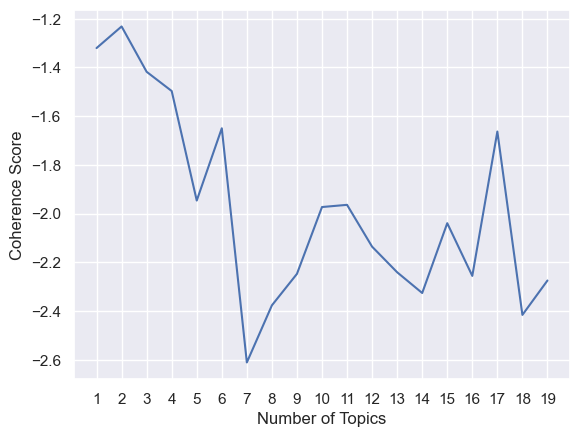

In [75]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
plt.plot(topics, score)
plt.xticks(topics)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

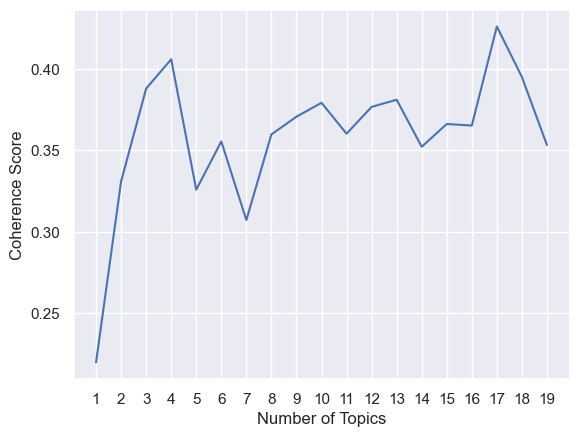

In [76]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = df['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
plt.plot(topics, score)
plt.xticks(topics)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

Since in both graphs the coherence score is pretty high for 4 topics, we will use 4 topics for our model.

In [77]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=4, workers = 4, passes=100)

In [78]:
lda_model.print_topics(-1)

[(0,
  '0.026*"google" + 0.020*"search" + 0.019*"user" + 0.016*"site" + 0.014*"information" + 0.012*"datum" + 0.011*"engine" + 0.010*"help" + 0.009*"laptop" + 0.009*"work"'),
 (1,
  '0.028*"security" + 0.023*"microsoft" + 0.021*"user" + 0.019*"virus" + 0.019*"mail" + 0.017*"program" + 0.017*"software" + 0.016*"e" + 0.015*"net" + 0.014*"information"'),
 (2,
  '0.018*"software" + 0.016*"tv" + 0.013*"company" + 0.013*"service" + 0.012*"content" + 0.010*"programme" + 0.010*"download" + 0.010*"mr" + 0.009*"net" + 0.009*"open"'),
 (3,
  '0.033*"mobile" + 0.028*"phone" + 0.019*"game" + 0.011*"technology" + 0.010*"network" + 0.010*"service" + 0.009*"mr" + 0.009*"gadget" + 0.008*"speed" + 0.008*"player"')]

In [79]:
df.doc[0]

The Arizona Attorney General (AG) Mark Brnovich has filed a consumer fraud lawsuit against Google, alleging that the company used “deceptive” practices to track the location of users even after they turned off location tracking.

Brnovich shared information about the lawsuit on his Twitter account. He accused Google of using “deceptive and unfair practices to obtain users’ location data”. This data is exploited for advertising, which accounts for more than 80 per cent of Google’s revenue.

Google collects detailed information about its users, including their physical locations, to target users for advertising. Often, this is done without the users’ consent or knowledge.

Brnovich wrote on Twitter: “Google collects detailed information about its users, including their physical locations, to target users for advertising. Often, this is done without the users’ consent or knowledge.”

He told the Washington Post that Google has been trying to find “misleading ways” to obtain information fr

In [80]:
lda_model[corpus][0]

[(0, 0.99601895)]

The first document belongs to topic 1 (87%) and topic 7 (13%).

#### Visualising the topics

In [81]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, mds='mmds')
pyLDAvis.display(lda_display)

/Users/peterbuschenreiter/Documents/KDG/Year 3/Data & AI 5/NLP/venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


#### Adding topics to the dataframe

In [82]:
df['text'] = [doc.text for doc in df['doc']]
df.text.head()

0     The Arizona Attorney General (AG) Mark Brnovic...
1     China net cafe culture crackdown\n\nChinese au...
2     Microsoft seeking spyware trojan\n\nMicrosoft ...
3     Digital guru floats sub-$100 PC\n\nNicholas Ne...
4     Technology gets the creative bug\n\nThe hi-tec...
                            ...                        
95    California sets fines for spyware\n\nThe maker...
96    Web helps collect aid donations\n\nThe web is ...
97    Mobiles rack up 20 years of use\n\nMobile phon...
98    Blogs take on the mainstream\n\nWeb logs or bl...
99    Mobile multimedia slow to catch on\n\nThere is...
Name: text, Length: 100, dtype: object

In [83]:
df['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(df['text']))]

In [84]:
df.topic.value_counts()

topic
0    45
1    23
3    19
2    13
Name: count, dtype: int64

In [85]:
query = "Are people too reliant on their mobile phones?"
vec_bow = dictionary.doc2bow(query.lower().split())
vec_lsa = lda_model[vec_bow]
vec_lsa

[(0, 0.12510021), (1, 0.12500173), (2, 0.12500203), (3, 0.62489605)]

In [86]:
file = similarities.MatrixSimilarity(lda_model[corpus])
sims = file[vec_lsa]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for i, sim in enumerate(sims):
    print(f'Doc: {sim[0] + 1} -- Similarity: {sim[1]}%')

Doc: 72 -- Similarity: 0.9890617728233337%
Doc: 69 -- Similarity: 0.9797953963279724%
Doc: 37 -- Similarity: 0.9773473143577576%
Doc: 92 -- Similarity: 0.9710283875465393%
Doc: 94 -- Similarity: 0.970741331577301%
Doc: 5 -- Similarity: 0.9697721600532532%
Doc: 59 -- Similarity: 0.9635134339332581%
Doc: 9 -- Similarity: 0.9629313945770264%
Doc: 82 -- Similarity: 0.9607772827148438%
Doc: 90 -- Similarity: 0.9602957963943481%
Doc: 46 -- Similarity: 0.9527080059051514%
Doc: 52 -- Similarity: 0.9518759846687317%
Doc: 17 -- Similarity: 0.9448662400245667%
Doc: 18 -- Similarity: 0.9448662400245667%
Doc: 25 -- Similarity: 0.9448662400245667%
Doc: 32 -- Similarity: 0.9448662400245667%
Doc: 40 -- Similarity: 0.9448662400245667%
Doc: 41 -- Similarity: 0.9448662400245667%
Doc: 45 -- Similarity: 0.9448662400245667%
Doc: 47 -- Similarity: 0.9448662400245667%
Doc: 50 -- Similarity: 0.9448662400245667%
Doc: 54 -- Similarity: 0.9448662400245667%
Doc: 55 -- Similarity: 0.9448662400245667%
Doc: 58 -- Sim

##### Bonus: Trying with more topics

In [87]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=16, workers = 4, passes=100)
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, mds='mmds')
pyLDAvis.display(lda_display)

/Users/peterbuschenreiter/Documents/KDG/Year 3/Data & AI 5/NLP/venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


# LSA - Latent Semantic Analysis

In [88]:
lsi_model = LsiModel(corpus = corpus, num_topics = 16, id2word = dictionary)

/Users/peterbuschenreiter/Documents/KDG/Year 3/Data & AI 5/NLP/venv/lib/python3.10/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/Users/peterbuschenreiter/Documents/KDG/Year 3/Data & AI 5/NLP/venv/lib/python3.10/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/Users/peterbuschenreiter/Documents/KDG/Year 3/Data & AI 5/NLP/venv/lib/python3.10/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/Users/pe

In [89]:
lsi_model.show_topics(num_topics = 16)

[(0,
  '0.425*"mobile" + 0.307*"phone" + 0.220*"game" + 0.178*"service" + 0.155*"user" + 0.142*"mr" + 0.142*"technology" + 0.135*"network" + 0.113*"time" + 0.107*"company"'),
 (1,
  '-0.393*"mobile" + -0.285*"phone" + 0.284*"user" + -0.245*"game" + 0.221*"security" + 0.209*"google" + 0.200*"microsoft" + 0.185*"software" + 0.158*"information" + 0.150*"program"'),
 (2,
  '-0.704*"game" + 0.213*"mobile" + -0.199*"console" + 0.194*"service" + 0.168*"phone" + -0.150*"create" + 0.133*"network" + -0.126*"mr" + -0.125*"microsoft" + -0.104*"play"'),
 (3,
  '-0.449*"google" + -0.270*"search" + 0.260*"virus" + 0.254*"security" + 0.222*"software" + 0.211*"mail" + 0.208*"program" + -0.207*"user" + 0.157*"e" + -0.135*"engine"'),
 (4,
  '0.389*"gadget" + -0.296*"network" + -0.256*"speed" + 0.230*"apple" + 0.225*"phone" + -0.192*"technology" + 0.186*"list" + -0.183*"g" + -0.130*"datum" + 0.122*"mail"'),
 (5,
  '0.365*"tv" + 0.297*"net" + -0.238*"user" + 0.209*"content" + 0.195*"mail" + 0.188*"programm

In [90]:
lsi_model_topics = [[word for word, prob in topic] for topic_id, topic in lsi_model.show_topics(formatted=False)]
lsi_model_topics

[['mobile',
  'phone',
  'game',
  'service',
  'user',
  'mr',
  'technology',
  'network',
  'time',
  'company'],
 ['mobile',
  'phone',
  'user',
  'game',
  'security',
  'google',
  'microsoft',
  'software',
  'information',
  'program'],
 ['game',
  'mobile',
  'console',
  'service',
  'phone',
  'create',
  'network',
  'mr',
  'microsoft',
  'play'],
 ['google',
  'search',
  'virus',
  'security',
  'software',
  'mail',
  'program',
  'user',
  'e',
  'engine'],
 ['gadget',
  'network',
  'speed',
  'apple',
  'phone',
  'technology',
  'list',
  'g',
  'datum',
  'mail'],
 ['tv',
  'net',
  'user',
  'content',
  'mail',
  'programme',
  'google',
  'service',
  'phone',
  'mobile'],
 ['gadget',
  'phone',
  'apple',
  'search',
  'user',
  'laptop',
  'mail',
  'google',
  'mobile',
  'device'],
 ['mail',
  'microsoft',
  'tv',
  'e',
  'music',
  'software',
  'site',
  'download',
  'service',
  'network'],
 ['search',
  'google',
  'mail',
  'engine',
  'microsoft',
 

In [91]:
query = "google is a big company"
vec_bow = dictionary.doc2bow(query.lower().split())
vec_lsi = lsi_model[vec_bow]
vec_lsi

[(0, 0.21354346052387152),
 (1, 0.3230422601930438),
 (2, -0.08339080858558842),
 (3, -0.5015485228478654),
 (4, -0.04887668429609879),
 (5, -0.1919101135815756),
 (6, 0.032141565881959155),
 (7, -0.12998365711678497),
 (8, 0.36042216435373714),
 (9, 0.004272551706743146),
 (10, -0.029005723602801632),
 (11, 0.07924123884516111),
 (12, -0.06281674572851587),
 (13, 0.15043262616914826),
 (14, -0.12380043631763037),
 (15, -0.11142905931186256)]

In [92]:
file = similarities.MatrixSimilarity(lsi_model[corpus])
sims = file[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for i, sim in enumerate(sims):
    print(f'Doc: {sim[0]} -- Similarity: {sim[1]}%')

Doc: 0 -- Similarity: 0.9195578098297119%
Doc: 9 -- Similarity: 0.874799907207489%
Doc: 12 -- Similarity: 0.8163147568702698%
Doc: 29 -- Similarity: 0.7810887694358826%
Doc: 20 -- Similarity: 0.6463168859481812%
Doc: 88 -- Similarity: 0.6346498727798462%
Doc: 13 -- Similarity: 0.612883448600769%
Doc: 64 -- Similarity: 0.5317180156707764%
Doc: 41 -- Similarity: 0.4959533214569092%
Doc: 56 -- Similarity: 0.44749027490615845%
Doc: 27 -- Similarity: 0.4334243834018707%
Doc: 21 -- Similarity: 0.4306037425994873%
Doc: 75 -- Similarity: 0.414844810962677%
Doc: 48 -- Similarity: 0.4081445336341858%
Doc: 74 -- Similarity: 0.39503511786460876%
Doc: 69 -- Similarity: 0.37572628259658813%
Doc: 14 -- Similarity: 0.3675222396850586%
Doc: 37 -- Similarity: 0.36173927783966064%
Doc: 78 -- Similarity: 0.35832542181015015%
Doc: 98 -- Similarity: 0.33804622292518616%
Doc: 50 -- Similarity: 0.3224020302295685%
Doc: 96 -- Similarity: 0.31363993883132935%
Doc: 65 -- Similarity: 0.3087314963340759%
Doc: 83 -